In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data

df = pd.read_csv("listings_wrangled")
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,0.03,1,267,1,4,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ..."
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,0.73,1,0,0,1,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide..."
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.30,2,322,0,2,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",..."
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,3.38,1,79,50,2,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ..."
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,0.31,3,365,1,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ..."


In [65]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9349
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
accommodates                         0
bedrooms                          3780
bathrooms_text                      45
amenities                            0
price_range                          0
total_price                          0
dtype: int64

To get a better understanding of the data, I will start of with answering a few questions.

> What is the average price, per night for a short-term renta in NYC based on the Airbnb listings data.

In [3]:
avg_price = round(df.price.mean(),2)
print(avg_price)

222.14


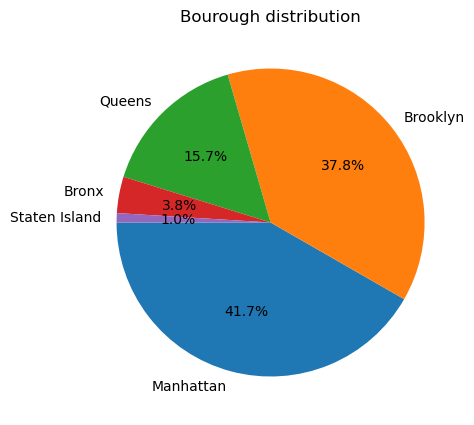

In [4]:
plt.figure(figsize=(9,5))
plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title("Bourough distribution")
plt.show()

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


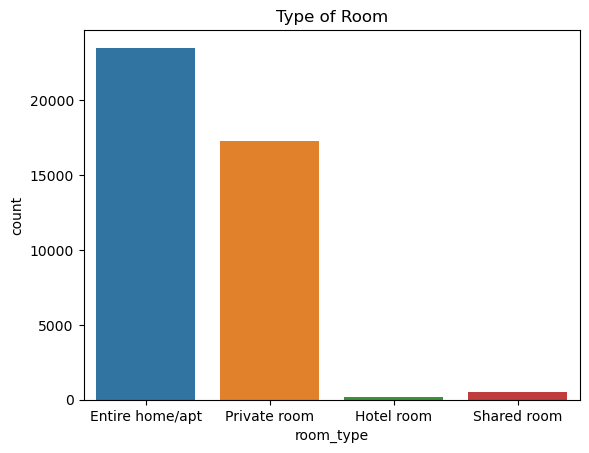

In [5]:
plt.figure()
plt.title("Type of Room")
sns.countplot(df.room_type)

plt.show()

Entire home/apt has the greatest share, followed by Private room. Shared rooms aren't too popular. Hotel room listings will be dropped.

In [6]:
df = df[df.room_type != 'Hotel room']

Room types on Neighborhood group

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


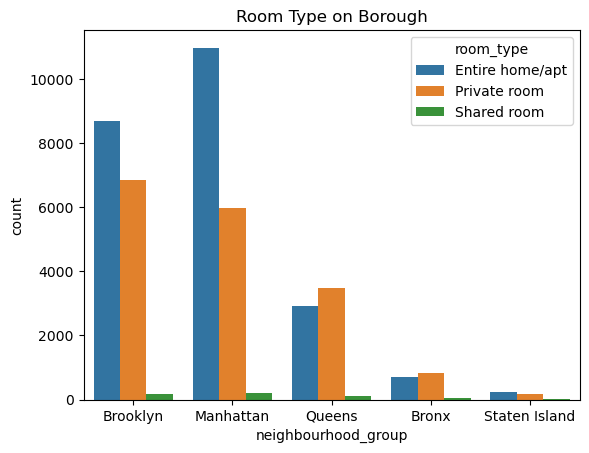

In [66]:
plt.figure()
plt.title("Room Type on Borough")
sns.countplot(df.neighbourhood_group, hue=df.room_type)
plt.show()

Interestingly, Queens and the Bronx residents are more likely to list a private room then the entire unit.

Next lets compare their availability.

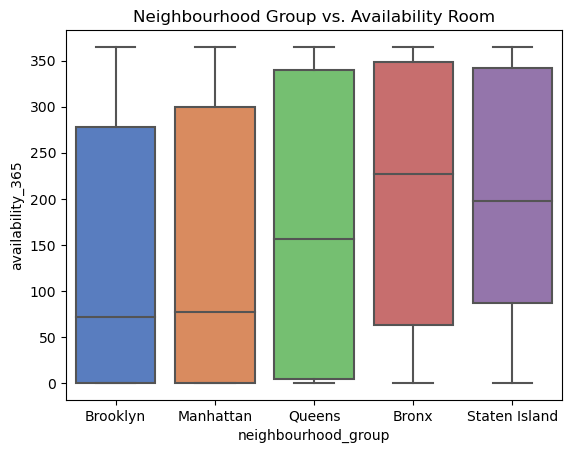

In [8]:
# plt.style.use('classic')
plt.figure()
plt.title("Neighbourhood Group vs. Availability")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="muted")
plt.show()

Next price distribution

In [129]:
df.price.describe()


count    41341.000000
mean       213.049539
std        401.424215
min         10.000000
25%         80.000000
50%        130.000000
75%        220.000000
max      19750.000000
Name: price, dtype: float64

In [83]:
print((df.price > 500).value_counts())
prop = len(df[df.price > 500]) / len(df)
print("Proportion of listings over $500: {:.2%}".format(prop))

False    38952
True      2393
Name: price, dtype: int64
Proportion of listings over $500: 5.79%


I took care of the "free" listings in an earlier step, but I haven't addressed the other outliers that are skewing the distribution. With a Max price over 400 times larger than the mean price, it will be difficult to meaningfully visualize the data. Since the 75th percentile is 220,  excluding any listings above $500 will allow me to better see the spread. Those listings represent nearly 6% of data though, so it is important not to draw any conclusions just yet. 

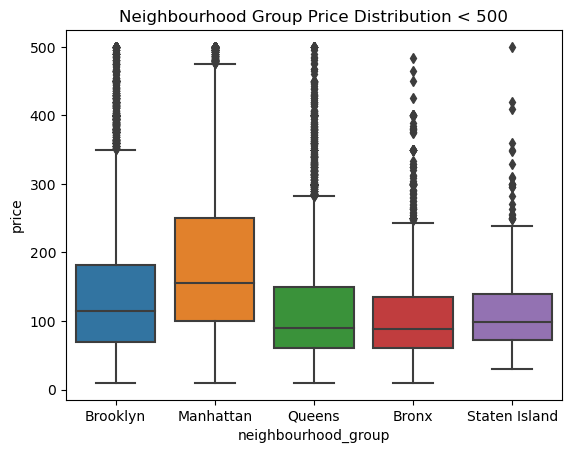

In [11]:
df_u500 = (df[df.price <= 500])
sns.boxplot(x='neighbourhood_group', y='price', data=df_u500)
plt.title('Neighbourhood Group Price Distribution < 500')
plt.show()


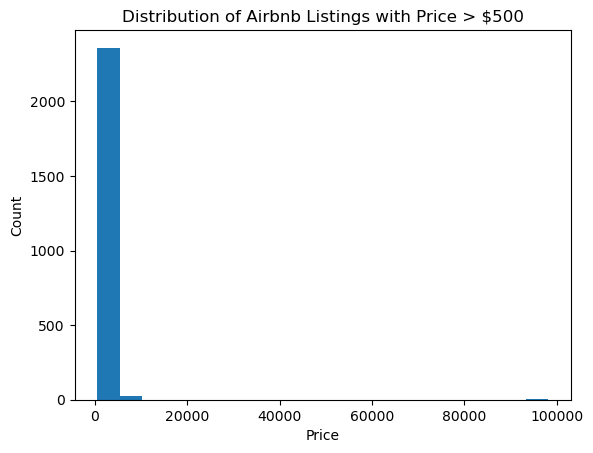

In [105]:
# Listings with price > $500?

df_o500 = (df[df.price > 500])
plt.hist(df_o500.price, bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Listings with Price > $500')
plt.show()

Most of the datapoints are below $20000. I will inspect the high-priced listings and determine whether they should be kept in the dataset or not.

In [107]:
high_price_listings = df[df['price'] >= 5000]
high_price_listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities,price_range,total_price
9256,15604499,The Parachute Loft Bedrm 1,62605071,Brooklyn,Coney Island,40.57717,-73.99986,Private room,75120,30,...,1.54,6,33,0,1,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Pe...",Extravagant,2253600
9645,16289102,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,40.63304,-74.11275,Private room,65115,2,...,0.75,3,1,5,2,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Shampoo"", ""Private ...",Extravagant,130230
31497,563183407738604083,A cozy one bedroom in ocean hill Brooklyn...,422985413,Brooklyn,Bedford-Stuyvesant,40.68193,-73.91635,Entire home/apt,98159,2,...,0.61,1,62,3,2,1.0,1 bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Ho...",Extravagant,196318
37227,706066765395654135,Zll White Favorite Room,445395972,Bronx,Wakefield,40.88671,-73.86431,Entire home/apt,95110,2,...,NaN,5,36,0,2,1.0,1 bath,"[""Bed linens"", ""Central heating"", ""Smoke alarm...",Extravagant,190220


The third listing above is currently priced at $98 on Airbnb's website, which is suspcisiously similar to the price listed here at 98159. These listings are all definitely mispriced. There is no point in checking and adjusting each one individually, I will just drop these listings.

In [108]:
df = df.drop(df[df.price >= 20000].index)

In [127]:
df[df.price >10000]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities,price_range,total_price
32817,603665411466936794,New York Estate,34906299,Manhattan,Upper East Side,40.765260,-73.971710,Entire home/apt,19750,7,...,NaN,1,285,0,16,5.0,5.5 baths,"[""Carbon monoxide alarm"", ""TV"", ""Kitchen"", ""Cl...",Extravagant,138250
34865,658503812592195974,Big 2 bedroom two bathroom in a doorman building.,363776653,Manhattan,East Harlem,40.786225,-73.942838,Entire home/apt,15000,21,...,NaN,1,0,0,4,2.0,2 baths,"[""Carbon monoxide alarm"", ""Outdoor dining area...",Extravagant,315000


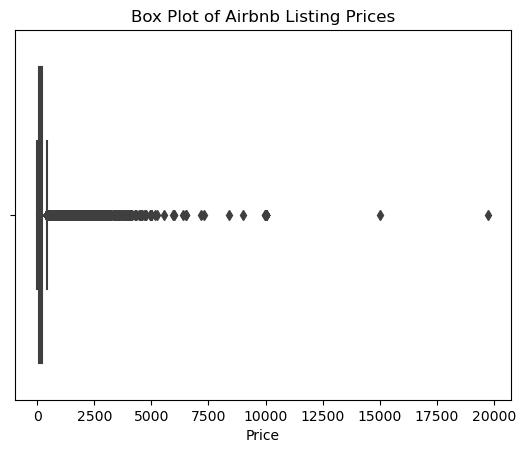

In [109]:
import seaborn as sns

# plot box plot of price distribution
sns.boxplot(x=df['price'])

# add labels and title to the plot
plt.xlabel('Price')
plt.title('Box Plot of Airbnb Listing Prices')
plt.show()


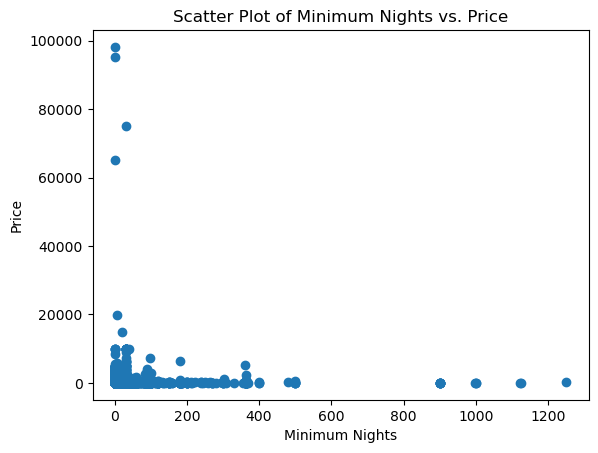

In [44]:
plt.scatter(df['minimum_nights'], df['price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Minimum Nights vs. Price')
plt.show()

PAUSE

In [14]:
boroughs = df.groupby("neighbourhood_group")["price"].agg(["sum", "mean", "median", "count"])
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, np.inf]
df["price_range"] = pd.cut(df["price"], bins=ranges, labels=label_names)
# prices_by_borough = df.groupby(["neighbourhood_group", "price_range"])["price_range"].count()
df.price_range.value_counts(sort=False)


Budget          7799
Average        19102
Expensive       9942
Extravagant     4502
Name: price_range, dtype: int64

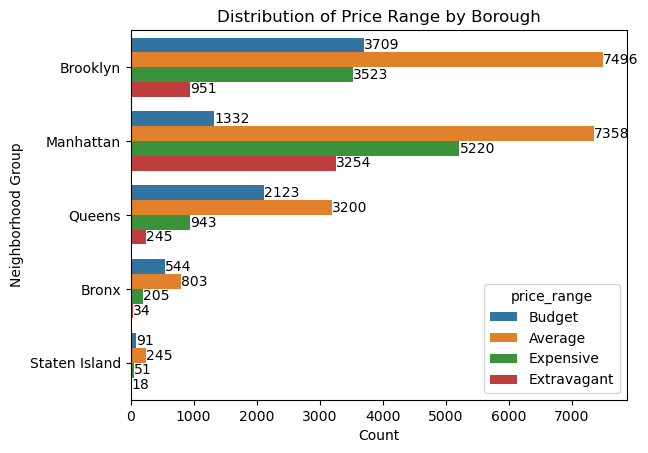

In [15]:
ax = sns.countplot(y='neighbourhood_group', hue='price_range', data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('Neighborhood Group')
plt.xlabel('Count')
plt.title('Distribution of Price Range by Borough')
plt.show()

In [16]:
# one_hot = pd.get_dummies(df['neighbourhood_group'])
# df = pd.concat([df, one_hot], axis=1)
# df.head()
# # features = list('price','bedrooms', '')

In [24]:

# print(df.groupby(["bathrooms_text", "rooms"])["price_range"].count())
# df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)',expand=False).astype(float)
df.bathrooms_text.value_counts()

1 bath               21710
1 shared bath         9565
1 private bath        2816
2 baths               2728
1.5 baths             1165
2 shared baths        1107
1.5 shared baths       721
2.5 baths              400
3 baths                302
0 shared baths         157
4 baths                126
3.5 baths              106
3 shared baths          95
2.5 shared baths        82
0 baths                 57
Half-bath               40
4.5 baths               36
Shared half-bath        17
5 baths                 16
4 shared baths          14
Private half-bath       12
6 baths                  8
5.5 baths                8
6.5 baths                3
3.5 shared baths         2
4.5 shared baths         2
6 shared baths           2
15.5 baths               1
7 baths                  1
8 baths                  1
Name: bathrooms_text, dtype: int64

In [131]:
df.dtypes

id                                   int64
name                                object
host_id                              int64
neighbourhood_group                 object
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
accommodates                         int64
bedrooms                           float64
bathrooms_text                      object
amenities                           object
price_range                       category
total_price                          int64
dtype: object